In [1]:
import networkx as nx 
import pandas as pd 
  
df = pd.read_csv('../extradata/userUserConnectionsInside.csv', delim_whitespace = True,  
                   header = None, names =['n1', 'n2', 'weight']) 
  
# G = nx.from_pandas_edgelist(df, 'n1', 'n2', edge_attr ='weight') 
  
# The Graph diagram does not show the edge weights.  
# However, we can get the weights by printing all the 
# edges along with the weights by the command below 
G = nx.DiGraph()
G.add_weighted_edges_from([tuple(x) for x in df.values])
G.edges()
# print(list(G.(data = True))) 

OutEdgeView([('FaktyTVN', 'konkret24'), ('FaktyTVN', 'tvn24'), ('konkret24', 'tvn24'), ('tvn24', 'konkret24'), ('tvn24', 'FaktyTVN'), ('tvp_info', 'RadioZET_NEWS'), ('tvp_info', 'WiadomosciTVP'), ('DemagogPL', 'konkret24')])

In [2]:
print("The various layout options are:") 
print([x for x in nx.__dir__() if x.endswith('_layout')]) 

The various layout options are:
['bipartite_layout', 'circular_layout', 'kamada_kawai_layout', 'random_layout', 'rescale_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'planar_layout', 'fruchterman_reingold_layout', 'spiral_layout']


In [3]:
junk = ['medialne','CrowdMedia_PL','dlapolski','Matka_Kurka','MediaNarodoweMN','niezaleznapl','PikioPL','RepublikaTV','wPrawopl','wSensie']
mainstream = ['wgospodarce','KRESYPL','bankier_pl','WiadomosciTVP','FaktyTVN','rzeczpospolita','OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl','tvp_info','tvn24','gazeta_wyborcza','gazetapl_news']
factcheck = ['DemagogPL','konkret24','oko_press','demaskator24','AntyFakePL']
color_map = []
for nodes in G.nodes():
    if nodes in junk:
        color_map.append('orange')
    elif nodes in mainstream:
        color_map.append('lightblue')
    elif nodes in factcheck:
        color_map.append('greenyellow')
    else:
        color_map.append('lightgray')
len(color_map)

7

Circular Layout


D:\Programms\Anaconda\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


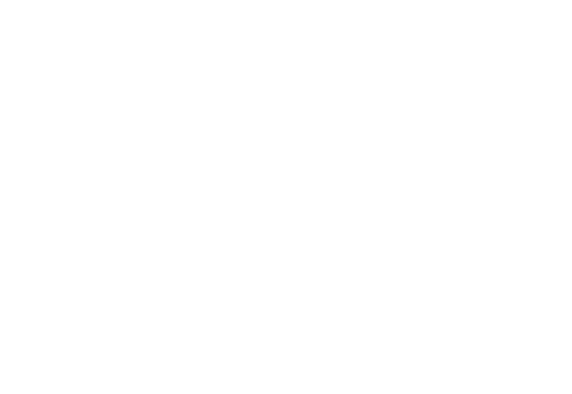

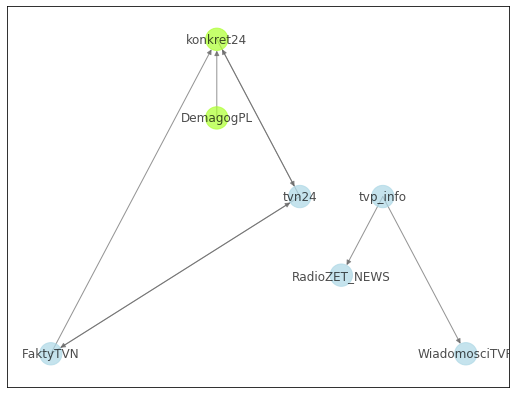

In [4]:
import matplotlib.pyplot as plt
# fixing the size of the figure 
plt.figure(figsize =(10, 7)) 
  
# node_color = [G.degree(v) for v in G] 
# node colour is a list of degrees of nodes 

  
# edge_width = [0.015 * G[u][v]['weight'] for u, v in G.edges()] 
# width of edge is a list of weight of edges 

  
plt.axis('off') 

plt.figure(figsize =(9, 7)) 
pos = nx.planar_layout(G)
# pos = nx.bipartite_layout(G, ['niezaleznapl', 'wPrawopl','wSensie'
#                               ,'KRESYPL','bankier_pl','FaktyTVN','rzeczpospolita',
#                              'OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl',
#                               'tvp_info','tvn24','gazeta_wyborcza','gazetapl_news'
# ]) 
print("Circular Layout") 
  
# demonstrating circular layout 
nx.draw_networkx(G, pos, node_size=500,
                 node_color = color_map, 
                 alpha = 0.7,  
                 with_labels = True, 
#                  width = edge_width,  
                 edge_color ='.4', 
                 cmap = plt.cm.Blues) 